# Library version 1.0 tests

In [1]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
from mlrefined_libraries import unsupervised_library as unsuplib

# demos for this notebook
regress_plotter = nonlib.nonlinear_regression_demos
datapath = '../../mlrefined_datasets/nonlinear_superlearn_datasets/'
unsup_datapath = '../../mlrefined_datasets/unsuperlearn_datasets/'

# import autograd functionality to bulid function's properly for optimizers
import autograd.numpy as np

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

# Continuous function approximation

In [2]:
csvname = datapath + 'universal_regression_function.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# import the v1 library
mylib = nonlib.library_v1.superlearn_setup.Setup(x,y)

# choose features
mylib.choose_features(name = 'multilayer_perceptron',layer_sizes = [1,100,1],activation = 'tanh')

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose cost
mylib.choose_cost(name = 'least_squares')

# fit an optimization
mylib.fit(max_its = 100,alpha_choice = 10**(-2))

# load up animator
demo = nonlib.run_animators.Visualizer(csvname)

# pluck out a sample of the weight history
num_frames = 10 # how many evenly spaced weights from the history to animate

# animate based on the sample weight history
demo.animate_1d_regression(mylib,num_frames,scatter = 'none',show_history = True)


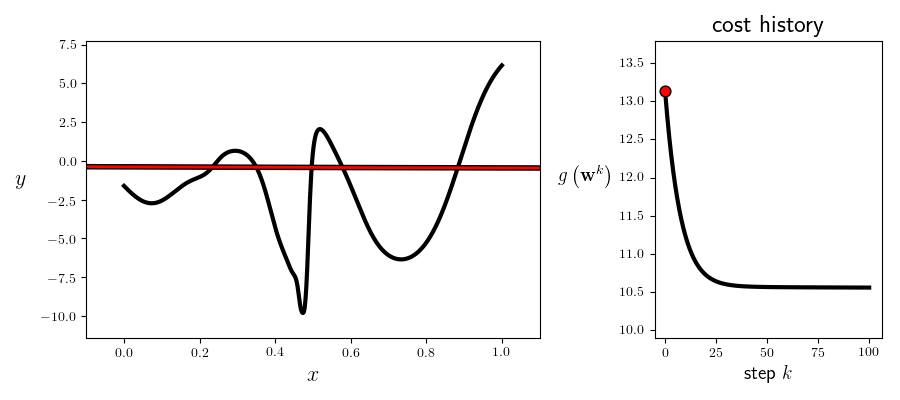
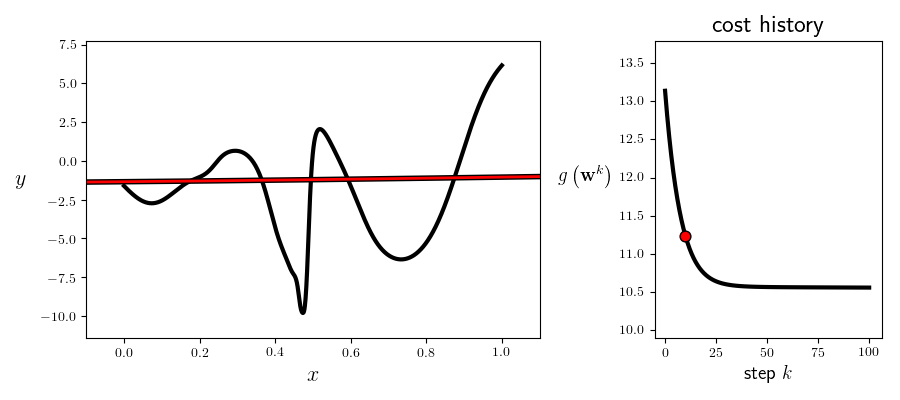
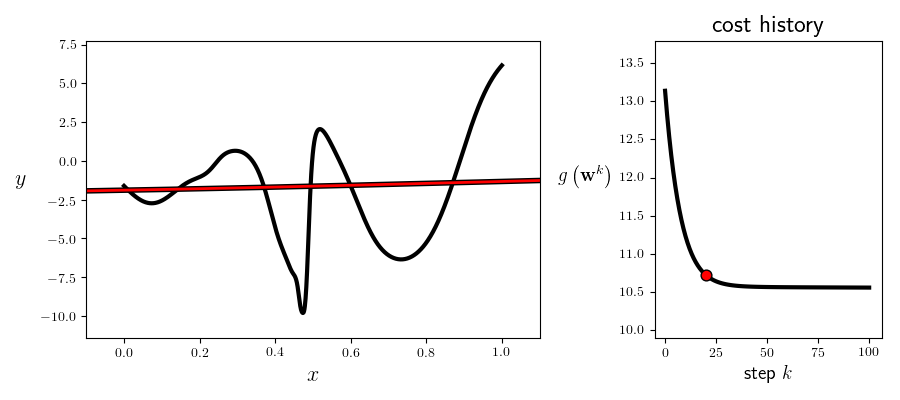
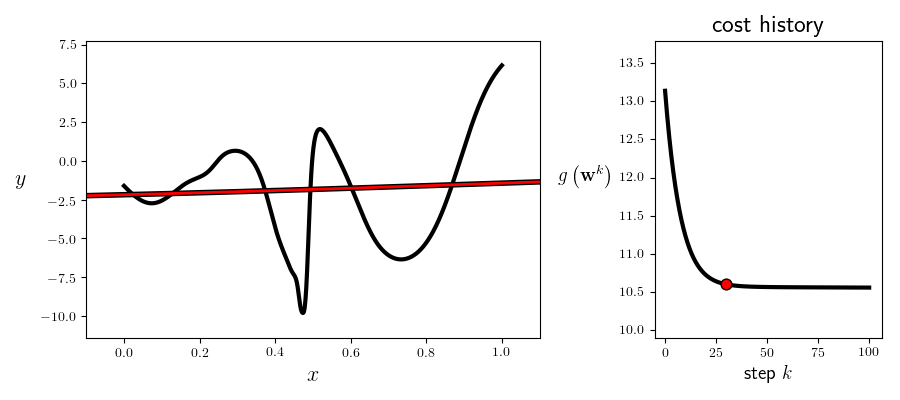
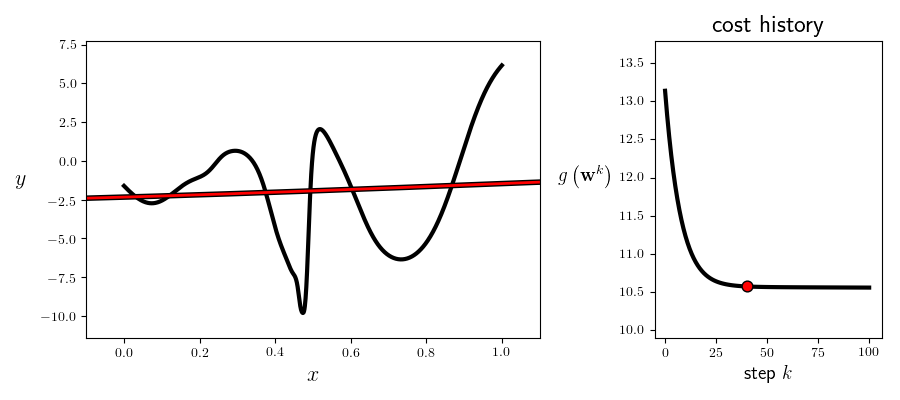
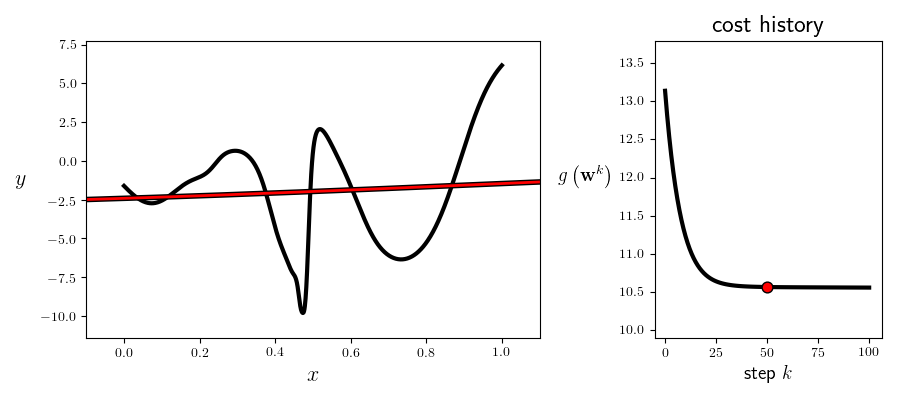
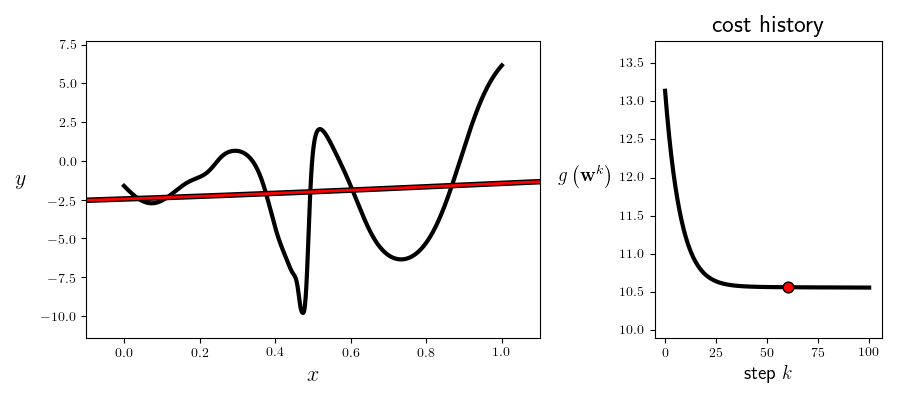
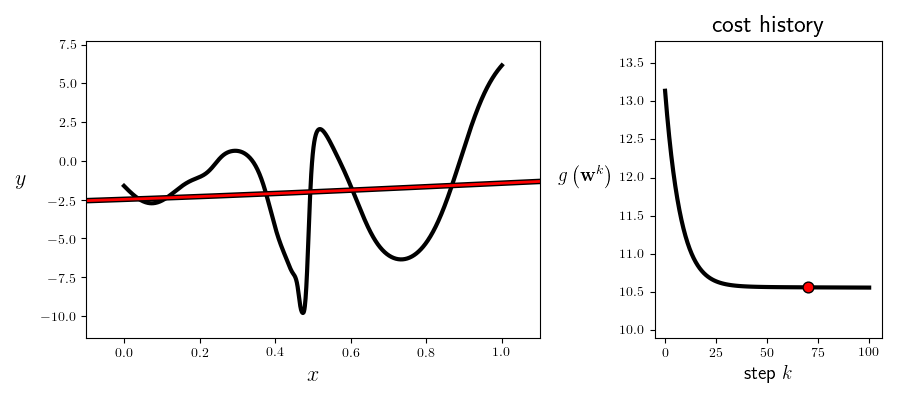
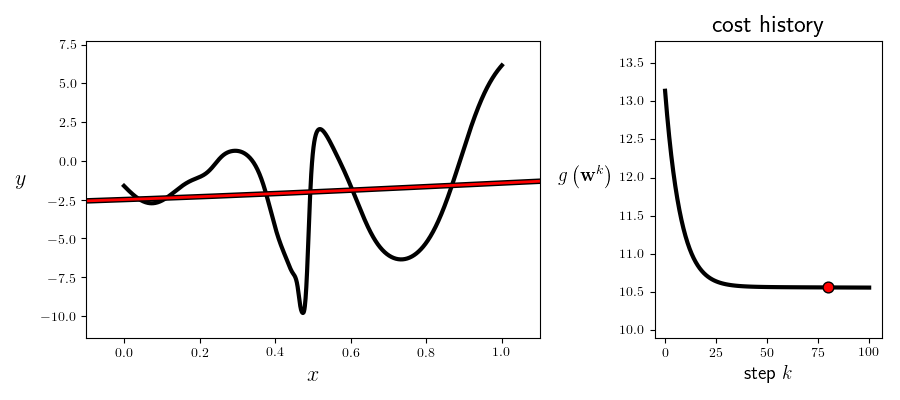
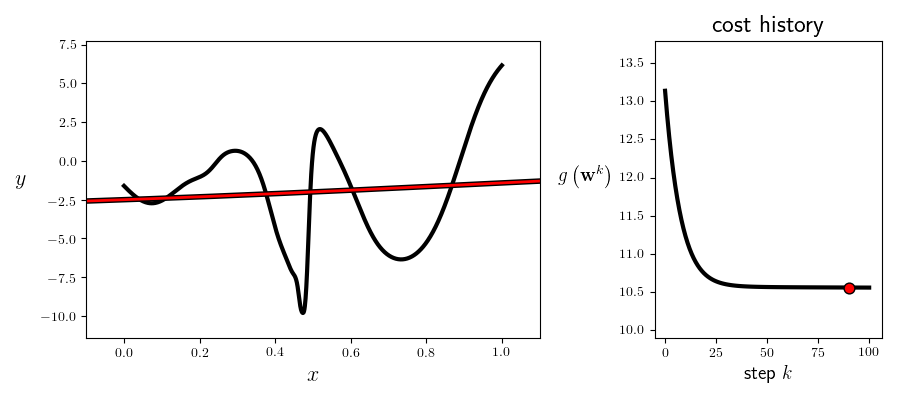
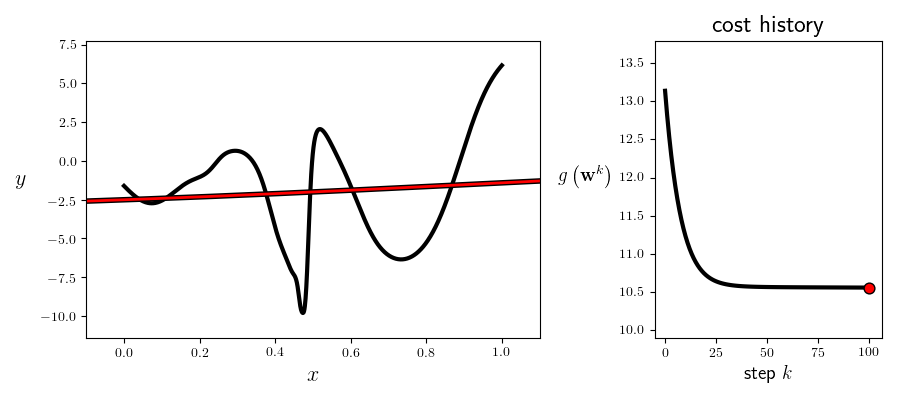